In [22]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.ndimage as spi
import matplotlib.pyplot as plt
from src.inference.classify import classify
import os
import sys
import urllib2
import tensorflow as tf

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (14,6)

### Clasify Image on the File System

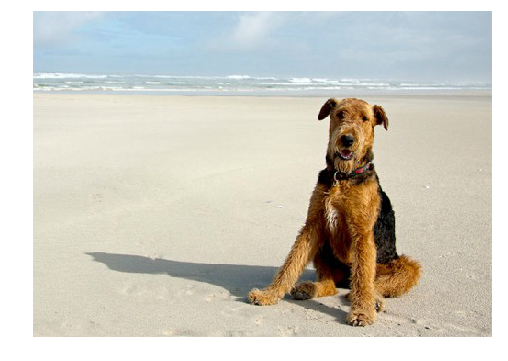

In [17]:
image_path = 'images/airedale.jpg'

img = plt.imshow(spi.imread(image_path))
img.set_cmap('hot')
_ = plt.axis('off')

In [28]:
probs = classify('file', 'images/airedale.jpg')
probs.index = probs.breed

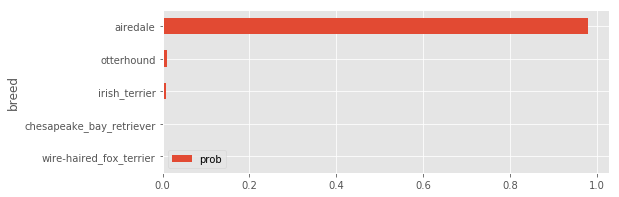

In [18]:
_ = probs.take(range(5)).sort_values(['prob']).plot.barh(figsize=(8, 3))

### Classify Image By Uri 

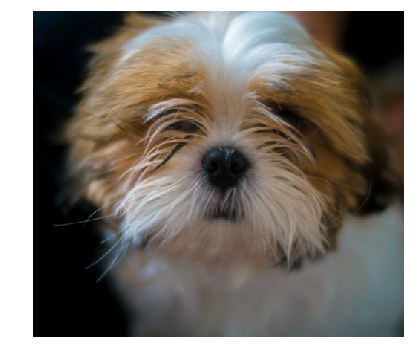

In [27]:
image_uri = 'https://raw.githubusercontent.com/stormy-ua/dog-breeds-classification/master/images/shih-tzu.jpg'

response = urllib2.urlopen(image_uri)
img_raw = response.read(response)

with tf.Graph().as_default(), tf.Session().as_default() as sess:
    img = tf.image.decode_image(contents=img_raw).eval()

img = plt.imshow(img)
img.set_cmap('hot')
_ = plt.axis('off')

In [29]:
probs = classify('uri', image_uri)
probs.index = probs.breed

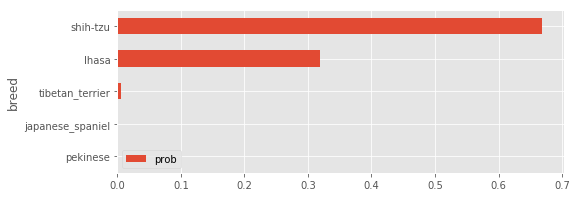

In [30]:
_ = probs.take(range(5)).sort_values(['prob']).plot.barh(figsize=(8, 3))